In [43]:
import ROOT as r
from ROOT import TFile, TTree, TH1F, TCanvas, TMath, TLegend
from array import array
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.ioff()
plt.style.use('default')
%matplotlib inline
%jsroot on 

In [2]:
folder = '/disk/lhcb_data2/RLcMuonic2016/MC_full_trueTrigger/'
samples = ['Lb_Lctaunu','Lb_LcDs']
polarities = ['MagUp','MagDown']

In [3]:
def ScaleHisto(h,value):
    scale = value/h.Integral()
    h.Scale(scale)
    return h

In [4]:
def GetLbIsolationBDT(sample,nbins,bmin,bmax):
    h = {polarity: r.TH1F('h_isoBDT_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities}
    branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M']
    weight = 'Event_PIDCalibEffWeight*w_LbCorr'
    if sample=='Lb_Lctaunu':
        branchesON+=['Event_FFcorr']
        weight +='*Event_FFcorr'
    for polarity in polarities:
        f = r.TFile(folder+sample+'_'+polarity+'_full.root','READ')
        t = f.Get('tupleout/DecayTree')
        fpresel = r.TFile(folder+sample+'_'+polarity+'_full_preselectionVars.root','READ')
        tpresel = fpresel.Get('DecayTree')
        t.AddFriend(tpresel)
        t.SetBranchStatus('*',0)
        for br in branchesON:
            t.SetBranchStatus(br,1)
        name = sample+'_'+polarity
        t.Draw('Lb_ISOLATION_BDT>>Lb_ISOLATION_BDT_'+name+'('+nbins+','+bmin+','+bmax+')',weight+'*(FinalSel==1)')
        h[polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT_'+name)
        h[polarity].SetDirectory(0)
    h1 = h['MagUp']
    h1.Add(h['MagDown'])
    h1_scaled = ScaleHisto(h1,1)
    return h1

In [5]:
def GetLbIsolationBDT2(sample,nbins,bmin,bmax,cut):
    h = {polarity: r.TH1F('h_isoBDT2_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities}
    branchesON = ['Lb_ISOLATION_BDT','Lb_ISOLATION_BDT2','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M']
    weight = 'Event_PIDCalibEffWeight*w_LbCorr'
    if sample=='Lb_Lctaunu':
        branchesON+=['Event_FFcorr']
        weight +='*Event_FFcorr'
    for polarity in polarities:
        f = r.TFile(folder+sample+'_'+polarity+'_full.root','READ')
        t = f.Get('tupleout/DecayTree')
        fpresel = r.TFile(folder+sample+'_'+polarity+'_full_preselectionVars.root','READ')
        tpresel = fpresel.Get('DecayTree')
        t.AddFriend(tpresel)
        t.SetBranchStatus('*',0)
        for br in branchesON:
            t.SetBranchStatus(br,1)
        name = sample+'_'+polarity
        t.Draw('Lb_ISOLATION_BDT2>>Lb_ISOLATION_BDT2_'+name+'('+nbins+','+bmin+','+bmax+')',weight+'*(FinalSel==1'+cut+')')
        h[polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT2_'+name)
        h[polarity].SetDirectory(0)
    h1 = h['MagUp']
    h1.Add(h['MagDown'])
    h1_scaled = ScaleHisto(h1,1)
    return h1

In [6]:
hBDT_signal = GetLbIsolationBDT('Lb_Lctaunu','50','-1','1')
hBDT_2charm = GetLbIsolationBDT('Lb_LcDs','50','-1','1')
c = r.TCanvas('c','',500,500)
hBDT_signal.SetLineColor(r.kAzure+9)
hBDT_signal.GetYaxis().SetRangeUser(0,0.2)
hBDT_signal.Draw('histo')
hBDT_2charm.SetLineColor(r.kOrange+2)
hBDT_2charm.Draw('histo same')
l = r.TLegend(0.1,0.7,0.48,0.9)
l.AddEntry(hBDT_signal,'#Lambda_{c}#tau#nu',"l")
l.AddEntry(hBDT_2charm,'#Lambda_{c}X_{c}',"l")
l.Draw()
c.Draw()

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [7]:
hBDT2_signal = GetLbIsolationBDT2('Lb_Lctaunu','50','-1','1','')
hBDT2_2charm = GetLbIsolationBDT2('Lb_LcDs','50','-1','1','')
c1 = r.TCanvas('c1','',500,500)
hBDT2_signal.SetLineColor(r.kAzure+9)
hBDT2_signal.GetYaxis().SetRangeUser(0,0.2)
hBDT2_signal.Draw('histo')
hBDT2_2charm.SetLineColor(r.kOrange+2)
hBDT2_2charm.Draw('histo same')
l1 = r.TLegend(0.1,0.7,0.48,0.9)
l1.AddEntry(hBDT2_signal,'#Lambda_{c}#tau#nu',"l")
l1.AddEntry(hBDT2_2charm,'#Lambda_{c}X_{c}',"l")
l1.Draw()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [8]:
hBDT2a_signal = GetLbIsolationBDT2('Lb_Lctaunu','50','-1','1','&&Lb_ISOLATION_BDT>0.35')
hBDT2a_2charm = GetLbIsolationBDT2('Lb_LcDs','50','-1','1','&&Lb_ISOLATION_BDT>0.35')
c2 = r.TCanvas('c2','',500,500)
hBDT2a_signal.SetLineColor(r.kAzure+9)
hBDT2a_signal.GetYaxis().SetRangeUser(0,0.2)
hBDT2a_signal.Draw('histo')
hBDT2a_2charm.SetLineColor(r.kOrange+2)
hBDT2a_2charm.Draw('histo same')
l2 = r.TLegend(0.1,0.7,0.48,0.9)
l2.AddEntry(hBDT2a_signal,'#Lambda_{c}#tau#nu',"l")
l2.AddEntry(hBDT2a_2charm,'#Lambda_{c}X_{c}',"l")
l2.Draw()
c2.Draw()

In [9]:
def CheckSelectionFractionsBDT(nbins,bmin,bmax,cut):
    print(cut)
    h = {sample:{polarity: r.TH1F('h_isoBDT_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities} for sample in samples}
    h1 = {sample:{polarity: r.TH1F('h1_isoBDT_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities} for sample in samples}

    SelectedEvts = {}
    TOTEvts = {}
    Fraction = {}
    for sample in samples:
        SelectedEvts[sample] = 0
        TOTEvts[sample] = 0
        Fraction[sample] = 0
        branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M']
        weight = 'Event_PIDCalibEffWeight*w_LbCorr'
        if sample=='Lb_Lctaunu':
            branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M','Event_FFcorr']
            weight = 'Event_PIDCalibEffWeight*w_LbCorr*Event_FFcorr'
        for polarity in polarities:
            f = r.TFile(folder+sample+'_'+polarity+'_full.root','READ')
            t = f.Get('tupleout/DecayTree')
            fpresel = r.TFile(folder+sample+'_'+polarity+'_full_preselectionVars.root','READ')
            tpresel = fpresel.Get('DecayTree')
            t.AddFriend(tpresel)
            t.SetBranchStatus('*',0)
            for br in branchesON:
                t.SetBranchStatus(br,1)
            name = sample+'_'+polarity
            t.Draw('Lb_ISOLATION_BDT>>Lb_ISOLATION_BDT_'+name+'('+nbins+','+bmin+','+bmax+')',
                   weight+'*(FinalSel==1&&'+cut+')')
            h[sample][polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT_'+name)
            t.Draw('Lb_ISOLATION_BDT>>Lb_ISOLATION_BDT_nocut_'+name+'('+nbins+','+bmin+','+bmax+')',
                   weight+'*(FinalSel==1)')
            h1[sample][polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT_nocut_'+name)
            h[sample][polarity].SetDirectory(0)
            h1[sample][polarity].SetDirectory(0)
            SelectedEvts[sample]+= h[sample][polarity].Integral()
            TOTEvts[sample]+= h1[sample][polarity].Integral()
            Fraction[sample] = SelectedEvts[sample]*100/TOTEvts[sample]
        print('Sample: '+sample+' , selected evts: '+str(SelectedEvts[sample])+' tot. evts: '+str(TOTEvts[sample])+
             '  fraction: '+str(Fraction[sample])+' %')
        
    return Fraction['Lb_Lctaunu'],Fraction['Lb_LcDs']

In [10]:
cuts = []
for i in range(32):
    cuts.append(round(-0.8+i*0.05,2))
print(cuts)

[-0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]


In [63]:
#sel, tot, frac = {}, {}, {}
f_signal, f_bkg = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal[i], f_bkg[i] = CheckSelectionFractionsBDT('50','-1','1','Lb_ISOLATION_BDT>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>-0.8
Sample: Lb_Lctaunu , selected evts: 18815.301405906677 tot. evts: 18825.53969734907  fraction: 99.94561488484797 %
Sample: Lb_LcDs , selected evts: 60226.8013330698 tot. evts: 60233.17479097843  fraction: 99.98941869172471 %
1 -0.75
Lb_ISOLATION_BDT>-0.75
Sample: Lb_Lctaunu , selected evts: 18788.004177570343 tot. evts: 18825.53969734907  fraction: 99.8006138449034 %
Sample: Lb_LcDs , selected evts: 60195.02148401737 tot. evts: 60233.17479097843  fraction: 99.93665732033308 %
2 -0.7
Lb_ISOLATION_BDT>-0.7
Sample: Lb_Lctaunu , selected evts: 18707.625876903534 tot. evts: 18825.53969734907  fraction: 99.3736497208516 %
Sample: Lb_LcDs , selected evts: 60115.705758690834 tot. evts: 60233.17479097843  fraction: 99.8049761901224 %
3 -0.65
Lb_ISOLATION_BDT>-0.65
Sample: Lb_Lctaunu , selected evts: 18476.426045894623 tot. evts: 18825.53969734907  fraction: 98.14553177721854 %
Sample: Lb_LcDs , selected evts: 59923.56524813175 tot. evts: 60233.17479097843  fraction:

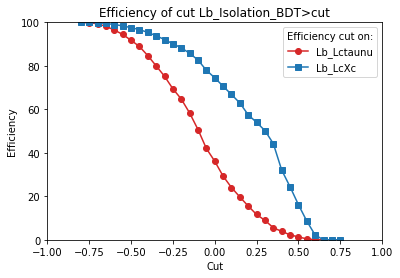

In [64]:
plt.title('Efficiency of cut Lb_Isolation_BDT>cut')
plt.plot(cuts, f_signal, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [21]:
def CheckSelectionFractionsBDT2(nbins,bmin,bmax,cut):
    print(cut)
    h = {sample:{polarity: r.TH1F('h_isoBDT2_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities} for sample in samples}
    h1 = {sample:{polarity: r.TH1F('h1_isoBDT2_'+sample+'_'+polarity,'',int(nbins),float(bmin),float(bmax))
                          for polarity in polarities} for sample in samples}

    SelectedEvts = {}
    TOTEvts = {}
    Fraction = {}
    for sample in samples:
        SelectedEvts[sample] = 0
        TOTEvts[sample] = 0
        Fraction[sample] = 0
        branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M','Lb_ISOLATION_BDT2']
        weight = 'Event_PIDCalibEffWeight*w_LbCorr'
        if sample=='Lb_Lctaunu':
            branchesON = ['Lb_ISOLATION_BDT','w_LbCorr','Event_PIDCalibEffWeight','FinalSel','Lc_M','Event_FFcorr',
                         'Lb_ISOLATION_BDT2']
            weight = 'Event_PIDCalibEffWeight*w_LbCorr*Event_FFcorr'
        for polarity in polarities:
            f = r.TFile(folder+sample+'_'+polarity+'_full.root','READ')
            t = f.Get('tupleout/DecayTree')
            fpresel = r.TFile(folder+sample+'_'+polarity+'_full_preselectionVars.root','READ')
            tpresel = fpresel.Get('DecayTree')
            t.AddFriend(tpresel)
            t.SetBranchStatus('*',0)
            for br in branchesON:
                t.SetBranchStatus(br,1)
            name = sample+'_'+polarity
            t.Draw('Lb_ISOLATION_BDT2>>Lb_ISOLATION_BDT2_'+name+'('+nbins+','+bmin+','+bmax+')',
                   weight+'*(FinalSel==1&&'+cut+')')
            h[sample][polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT2_'+name)
            t.Draw('Lb_ISOLATION_BDT2>>Lb_ISOLATION_BDT2_nocut_'+name+'('+nbins+','+bmin+','+bmax+')',
                   weight+'*(FinalSel==1)')
            h1[sample][polarity] = r.gPad.GetPrimitive('Lb_ISOLATION_BDT2_nocut_'+name)
            h[sample][polarity].SetDirectory(0)
            h1[sample][polarity].SetDirectory(0)
            SelectedEvts[sample]+= h[sample][polarity].Integral()
            TOTEvts[sample]+= h1[sample][polarity].Integral()
            Fraction[sample] = SelectedEvts[sample]*100/TOTEvts[sample]
        print('Sample: '+sample+' , selected evts: '+str(SelectedEvts[sample])+' tot. evts: '+str(TOTEvts[sample])+
             '  fraction: '+str(Fraction[sample])+' %')
        
    return Fraction['Lb_Lctaunu'],Fraction['Lb_LcDs']

In [65]:
f_signal_2, f_bkg_2 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_2[i], f_bkg_2[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 986.3432701379061 tot. evts: 17243.794355273247  fraction: 5.719989752929736 %
Sample: Lb_LcDs , selected evts: 26274.96635198593 tot. evts: 58008.27879703045  fraction: 45.29520078318717 %
1 -0.75
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 984.3557974696159 tot. evts: 17243.794355273247  fraction: 5.708464025892274 %
Sample: Lb_LcDs , selected evts: 26262.725595474243 tot. evts: 58008.27879703045  fraction: 45.27409904259852 %
2 -0.7
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 980.4147120118141 tot. evts: 17243.794355273247  fraction: 5.685608931609637 %
Sample: Lb_LcDs , selected evts: 26244.14603161812 tot. evts: 58008.27879703045  fraction: 45.242069883586346 %
3 -0.65
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 966.1676130890846 tot. evts: 17243.794355273247  fraction: 5.6029873

Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
30 0.7
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>0.7
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.35&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %


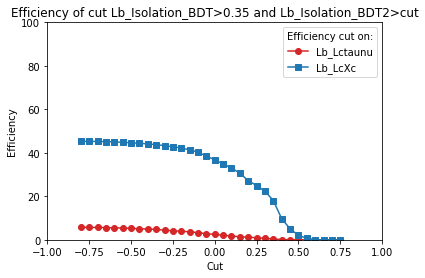

In [66]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.35 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_2, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_2, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [67]:
f_signal_3, f_bkg_3 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_3[i], f_bkg_3[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 1608.7951170355082 tot. evts: 17243.794355273247  fraction: 9.32970484273683 %
Sample: Lb_LcDs , selected evts: 29807.772288799286 tot. evts: 58008.27879703045  fraction: 51.38537620310362 %
1 -0.75
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 1606.4434242248535 tot. evts: 17243.794355273247  fraction: 9.316066934732346 %
Sample: Lb_LcDs , selected evts: 29793.324121952057 tot. evts: 58008.27879703045  fraction: 51.3604691257918 %
2 -0.7
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 1602.5023390054703 tot. evts: 17243.794355273247  fraction: 9.293211841832342 %
Sample: Lb_LcDs , selected evts: 29769.79660320282 tot. evts: 58008.27879703045  fraction: 51.31991022758426 %
3 -0.65
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 1582.3794847726822 tot. evts: 17243.794355273247  fraction: 9.176515633

Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
30 0.7
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>0.7
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.3&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %


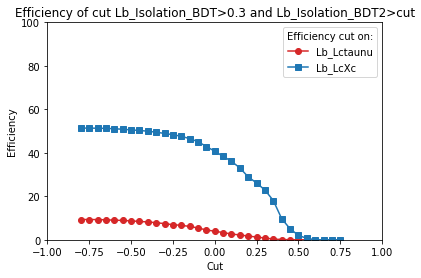

In [68]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.3 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_3, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_3, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [69]:
f_signal_4, f_bkg_4 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_4[i], f_bkg_4[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 2100.4868321567774 tot. evts: 17243.794355273247  fraction: 12.181117385654955 %
Sample: Lb_LcDs , selected evts: 32044.743693828583 tot. evts: 58008.27879703045  fraction: 55.241673013523396 %
1 -0.75
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 2097.6452312469482 tot. evts: 17243.794355273247  fraction: 12.1646384086312 %
Sample: Lb_LcDs , selected evts: 32028.717114448547 tot. evts: 58008.27879703045  fraction: 55.21404492368451 %
2 -0.7
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 2092.7336164712906 tot. evts: 17243.794355273247  fraction: 12.136155032673079 %
Sample: Lb_LcDs , selected evts: 32002.539052009583 tot. evts: 58008.27879703045  fraction: 55.168916774768796 %
3 -0.65
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 2069.4872180223465 tot. evts: 17243.794355273247  fraction: 1

Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
30 0.7
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>0.7
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.25&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %


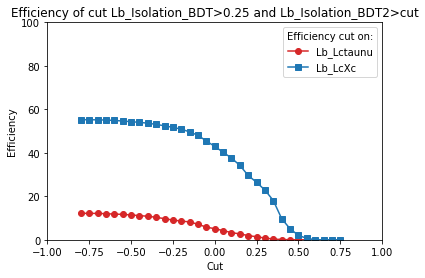

In [70]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.25 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_4, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_4, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [71]:
f_signal_5, f_bkg_5 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_5[i], f_bkg_5[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 2811.1549958586693 tot. evts: 17243.794355273247  fraction: 16.302415454165995 %
Sample: Lb_LcDs , selected evts: 34107.002764225006 tot. evts: 58008.27879703045  fraction: 58.796784651316024 %
1 -0.75
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 2806.6650688648224 tot. evts: 17243.794355273247  fraction: 16.2763775248023 %
Sample: Lb_LcDs , selected evts: 34089.72959327698 tot. evts: 58008.27879703045  fraction: 58.767007572412396 %
2 -0.7
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 2800.685968518257 tot. evts: 17243.794355273247  fraction: 16.24170359965927 %
Sample: Lb_LcDs , selected evts: 34062.52239942551 tot. evts: 58008.27879703045  fraction: 58.72010531222524 %
3 -0.65
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 2771.3115392923355 tot. evts: 17243.794355273247  fraction: 16.071355

Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
30 0.7
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>0.7
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.2&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %


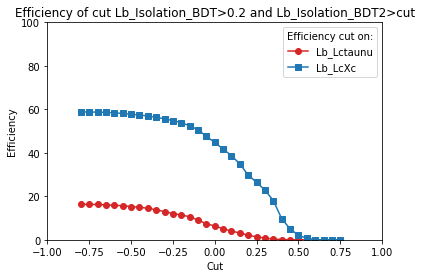

In [72]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.2 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_5, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_5, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()

In [73]:
f_signal_6, f_bkg_6 = [ 0 for x in range(len(cuts))], [ 0 for x in range(len(cuts))]
for i, cut in enumerate(cuts):
    print(i, cut)
    f_signal_6[i], f_bkg_6[i] = CheckSelectionFractionsBDT2('50','-1','1','Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>'+str(cut))

0 -0.8
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>-0.8
Sample: Lb_Lctaunu , selected evts: 684.8081297427416 tot. evts: 17243.794355273247  fraction: 3.971330877843156 %
Sample: Lb_LcDs , selected evts: 19047.4454780519 tot. evts: 58008.27879703045  fraction: 32.83573633463328 %
1 -0.75
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>-0.75
Sample: Lb_Lctaunu , selected evts: 682.8206571340561 tot. evts: 17243.794355273247  fraction: 3.959805151151352 %
Sample: Lb_LcDs , selected evts: 19037.61343678832 tot. evts: 58008.27879703045  fraction: 32.818786958669236 %
2 -0.7
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>-0.7
Sample: Lb_Lctaunu , selected evts: 680.1431326270103 tot. evts: 17243.794355273247  fraction: 3.944277683983275 %
Sample: Lb_LcDs , selected evts: 19024.401653766632 tot. evts: 58008.27879703045  fraction: 32.79601127337798 %
3 -0.65
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>-0.65
Sample: Lb_Lctaunu , selected evts: 668.768475651741 tot. evts: 17243.794355273247  fraction: 3.8783139132439

Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
30 0.7
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>0.7
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %
31 0.75
Lb_ISOLATION_BDT>0.4&&Lb_ISOLATION_BDT2>0.75
Sample: Lb_Lctaunu , selected evts: 0.0 tot. evts: 17243.794355273247  fraction: 0.0 %
Sample: Lb_LcDs , selected evts: 0.0 tot. evts: 58008.27879703045  fraction: 0.0 %


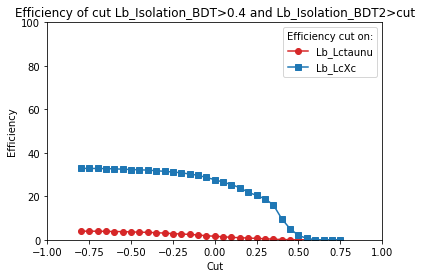

In [74]:
plt.title('Efficiency of cut Lb_Isolation_BDT>0.4 and Lb_Isolation_BDT2>cut')
plt.plot(cuts, f_signal_6, color='tab:red',marker='o',label='Lb_Lctaunu')
plt.plot(cuts, f_bkg_6, color='tab:blue',marker='s',label='Lb_LcXc')
plt.legend(title='Efficiency cut on:')
plt.axis([-1, 1, 0, 100])
plt.xlabel("Cut")
plt.ylabel("Efficiency")
plt.show()